In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import *
from xgboost import XGBRegressor, plot_importance
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV

In [2]:
import plotly.express as px

In [4]:
df = pd.read_csv("Datas/data_frame_florian.csv")

In [4]:
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,heure
0,1,0,0,1,9.84,81,0.0,16,0
1,1,0,0,1,9.02,80,0.0,40,1
2,1,0,0,1,9.02,80,0.0,32,2
3,1,0,0,1,9.84,75,0.0,13,3
4,1,0,0,1,9.84,75,0.0,1,4


# pycaret

In [10]:
model_pc = setup(data=df,target="count")

,Description,Value
0,session_id,1554
1,Target,count
2,Original Data,"(10886, 10)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7620, 14)"


In [11]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,46.4723,4665.6666,68.1756,0.8544,0.4662,0.5161,0.1470
xgboost,Extreme Gradient Boosting,46.8919,4802.6399,69.2062,0.8499,0.5248,0.5512,57.3730
rf,Random Forest Regressor,46.9835,5061.6922,71.0117,0.8418,0.4329,0.4434,0.5170
et,Extra Trees Regressor,47.6544,5362.3959,73.0886,0.8324,0.4405,0.4494,0.4220
gbr,Gradient Boosting Regressor,57.9211,7155.6422,84.4636,0.7762,0.6562,0.8847,0.1550
dt,Decision Tree Regressor,60.9916,9518.2946,97.4206,0.7019,0.5511,0.5258,0.0170
ada,AdaBoost Regressor,91.9719,13504.7697,116.1151,0.5764,1.0140,2.3493,0.1110
knn,K Neighbors Regressor,86.1317,15818.6448,125.6354,0.5052,0.8912,1.7102,0.0180
br,Bayesian Ridge,106.5706,20967.0774,144.7058,0.3436,1.2039,3.1394,0.0090
ridge,Ridge Regression,106.6117,20967.4389,144.7059,0.3436,1.2043,3.1443,0.0090


# XGBoost

In [5]:
y = df.pop("count")
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)



In [6]:
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,heure
0,1,0,0,1,9.84,81,0.0,0
1,1,0,0,1,9.02,80,0.0,1
2,1,0,0,1,9.02,80,0.0,2
3,1,0,0,1,9.84,75,0.0,3
4,1,0,0,1,9.84,75,0.0,4


In [7]:
xgb = XGBRegressor()
cat_feature = ["season","weather"]
cat_pip = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
num_feature = ["temp","humidity","windspeed","heure"]
num_pip = make_pipeline(StandardScaler())
preprocessor = make_column_transformer((cat_pip,cat_feature),(num_pip,num_feature),remainder="passthrough")

pip = make_pipeline(preprocessor,xgb)

In [8]:

model_xgb = pip.fit(X_train,y_train)

In [9]:
model_xgb.score(X_test,y_test)

0.8588667899172001

In [9]:
model_xgb[1]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

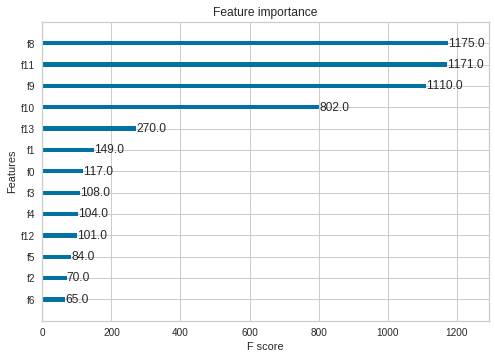

In [10]:
plot_importance(model_xgb[1])

In [10]:
xgb_score = model_xgb[1].get_booster().get_fscore()
xgb_score

{'f0': 117.0,
 'f1': 149.0,
 'f2': 70.0,
 'f3': 108.0,
 'f4': 104.0,
 'f5': 84.0,
 'f6': 65.0,
 'f8': 1175.0,
 'f9': 1110.0,
 'f10': 802.0,
 'f11': 1171.0,
 'f12': 101.0,
 'f13': 270.0}

In [11]:
model_xgb[0].transformers_[1]

('pipeline-2',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 ['temp', 'humidity', 'windspeed', 'heure'])

In [12]:
model_xgb[0].transformers_[0][1]["onehotencoder"].get_feature_names(cat_feature)


array(['season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4'], dtype=object)

In [13]:
model_xgb[0].transformers_[2]


('remainder', 'passthrough', [1, 2])

In [15]:
X.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,heure
0,1,0,0,1,9.84,81,0.0,0
1,1,0,0,1,9.02,80,0.0,1
2,1,0,0,1,9.02,80,0.0,2
3,1,0,0,1,9.84,75,0.0,3
4,1,0,0,1,9.84,75,0.0,4


In [14]:
model_xgb[0].transformers_[0]

('pipeline-1',
 Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore'))]),
 ['season', 'weather'])

In [15]:
liste_feature = ['season_1', 'season_2', 'season_3', 'season_4', 'weather_1','weather_2', 'weather_3','temp', 'humidity', 'windspeed', 'heure',"holiday","workingday"]
len(liste_feature)
len(list(xgb_score.values()))

13

([<matplotlib.axis.YTick at 0x7f7fa02915e0>,
 [Text(0, 0, 'season_1'),
  Text(0, 1, 'season_2'),
  Text(0, 2, 'season_3'),
  Text(0, 3, 'season_4'),
  Text(0, 4, 'weather_1'),
  Text(0, 5, 'weather_2'),
  Text(0, 6, 'weather_3'),
  Text(0, 7, 'temp'),
  Text(0, 8, 'humidity'),
  Text(0, 9, 'windspeed'),
  Text(0, 10, 'heure'),
  Text(0, 11, 'holiday'),
  Text(0, 12, 'workingday')])

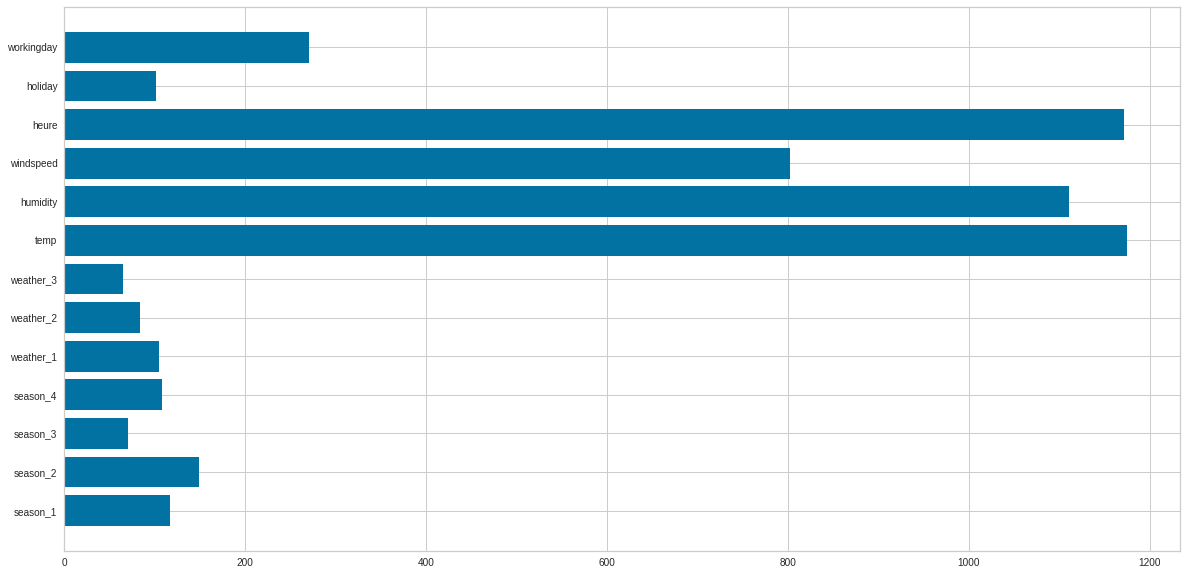

In [16]:
fig = plt.figure(figsize=(20,10))
y_pos = range(0,len(liste_feature))

plt.barh(y_pos,list(xgb_score.values()))
plt.yticks(y_pos,liste_feature)

In [17]:
list(xgb_score.values())

[117.0,
 149.0,
 70.0,
 108.0,
 104.0,
 84.0,
 65.0,
 1175.0,
 1110.0,
 802.0,
 1171.0,
 101.0,
 270.0]

XGBoost avec les bons train/test

In [18]:
X_test = pd.read_csv("Datas/data_frame_test_florian.csv")
X_train = pd.read_csv("Datas/data_frame_train_florian.csv")
date = X_test.pop("datetime")
X_train.pop("datetime")

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
               ...         
9034    2012-08-19 19:00:00
9035    2012-08-19 20:00:00
9036    2012-08-19 21:00:00
9037    2012-08-19 22:00:00
9038    2012-08-19 23:00:00
Name: datetime, Length: 9039, dtype: object

In [19]:
X_test.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,heure,month,year
0,3,0,0,1,30.34,62,7.0015,168,0,9,2012
1,3,0,0,1,29.52,74,8.9981,79,1,9,2012
2,3,0,0,1,28.70,70,11.0014,69,2,9,2012
3,3,0,0,1,28.70,70,7.0015,35,3,9,2012
4,3,0,0,1,28.70,70,0.0000,12,4,9,2012


In [20]:
y_train = X_train.pop("count")
y_test = X_test.pop("count")

In [21]:
X_train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,heure,month,year
0,1,0,0,1,9.84,81,0.0,0,1,2011
1,1,0,0,1,9.02,80,0.0,1,1,2011
2,1,0,0,1,9.02,80,0.0,2,1,2011
3,1,0,0,1,9.84,75,0.0,3,1,2011
4,1,0,0,1,9.84,75,0.0,4,1,2011


In [22]:
xgb = XGBRegressor()
cat_feature = ["season","weather","year"]
cat_pip = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
num_feature = ["temp","humidity","windspeed","heure","month"]
num_pip = make_pipeline(StandardScaler())
preprocessor = make_column_transformer((cat_pip,cat_feature),(num_pip,num_feature),remainder="passthrough")

pip = make_pipeline(preprocessor,xgb)

In [23]:
model_xgb = pip.fit(X_train,y_train)


print(model_xgb.score(X_train,y_train))
model_xgb.score(X_test,y_test)


0.9794626556375536


0.9006326610144423

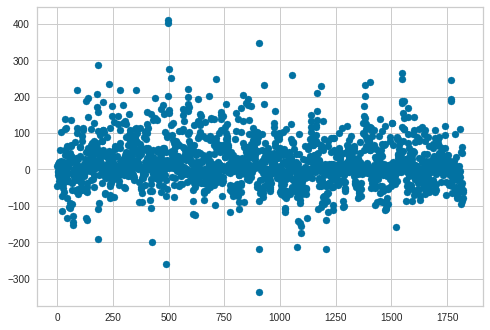

In [24]:
res = y_test - model_xgb.predict(X_test)

plt.scatter(range(0,len(res)),res)

In [25]:
X_test_res = X_test
X_test_res["res"] = res
X_test_res["date"] = date

fig = px.scatter(X_test_res,y="res",hover_data=["heure","humidity","temp","date"])
#fig.update_traces(mode="markers")
fig.show()

In [26]:
res.mean()

17.470716593459095

In [29]:
masque = [df_analyses["heure"]==3]
masque

NameError: name 'df_analyses' is not defined

In [27]:
dates_foireuses = list(X_test_res[abs(X_test_res["res"]) > 200]["date"])
df_analyses = pd.read_csv("Datas/train.csv")
df_analyses["datetime"] = pd.to_datetime(df_analyses["datetime"])

# for i in df_analyses["datetime"]:
#     if i in 
df_analyses["heure"] = [d.time().hour for d in df_analyses["datetime"]]
df_analyses["jour"] = [d.day for d in df_analyses["datetime"]]
df_analyses["mois"] = [d.month for d in df_analyses["datetime"]]

df_date = df_analyses[[str(d) in dates_foireuses for d in df_analyses["datetime"]]]

df_date.reset_index(inplace=True)


df_test = pd.DataFrame()
for i in range(0,df_date.shape[0]):
    masque = (df_analyses["heure"]==df_date.loc[i]["heure"]) & (df_analyses["mois"]==df_date.loc[i]["mois"]) & (df_analyses["jour"]==df_date.loc[i]["jour"])
    #masque = [(d["heure"]==row["heure"]) & (d["jour"]==row["jour"]) & (d["mois"]==row["mois"]) for d in df_analyses]
    df_test = df_test.append(df_analyses[masque])
    

df_test


# df_date["datetime"][9152]

# df_test = pd.DataFrame()
# for d in df_date:
#     df_test = df_test.append(d)
#     date = d["datetime"]
#     if 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,heure,jour,mois
3691,2011-09-04 17:00:00,3,0,0,1,31.16,36.365,66,15.0013,204,172,376,17,4,9
9152,2012-09-04 17:00:00,3,0,1,1,31.16,36.365,70,23.9994,110,746,856,17,4,9
3780,2011-09-08 12:00:00,3,0,1,2,27.06,29.545,94,15.0013,17,85,102,12,8,9
9243,2012-09-08 12:00:00,3,0,0,1,32.80,37.880,55,32.9975,220,474,694,12,8,9
3783,2011-09-08 15:00:00,3,0,1,3,27.06,29.545,89,19.9995,24,115,139,15,8,9
9246,2012-09-08 15:00:00,3,0,0,3,22.96,26.515,88,16.9979,175,337,512,15,8,9
3834,2011-09-10 18:00:00,3,0,0,1,29.52,33.335,58,12.9980,119,241,360,18,10,9
9297,2012-09-10 18:00:00,3,0,1,1,25.42,31.060,35,19.9995,111,857,968,18,10,9
3881,2011-09-12 18:00:00,3,0,1,1,28.70,32.575,54,12.9980,56,515,571,18,12,9
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.060,44,16.9979,91,886,977,18,12,9


In [28]:
df_test = pd.DataFrame()
df_test = df_test.append(df_analyses.loc[0])
df_test


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,heure,jour,mois
0,2011-01-01,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,16.0,0.0,1.0,1.0


importance ?

In [32]:
liste_feature.remove("weather_4")
liste_feature

ValueError: list.remove(x): x not in list

([<matplotlib.axis.YTick at 0x7f7f8b44adf0>,
 [Text(0, 0, 'season_1'),
  Text(0, 1, 'season_2'),
  Text(0, 2, 'season_3'),
  Text(0, 3, 'season_4'),
  Text(0, 4, 'weather_1'),
  Text(0, 5, 'weather_2'),
  Text(0, 6, 'weather_3'),
  Text(0, 7, 'year_2011'),
  Text(0, 8, 'year_2012'),
  Text(0, 9, 'temp'),
  Text(0, 10, 'humidity'),
  Text(0, 11, 'windspeed'),
  Text(0, 12, 'heure'),
  Text(0, 13, 'month'),
  Text(0, 14, 'holiday'),
  Text(0, 15, 'workingday')])

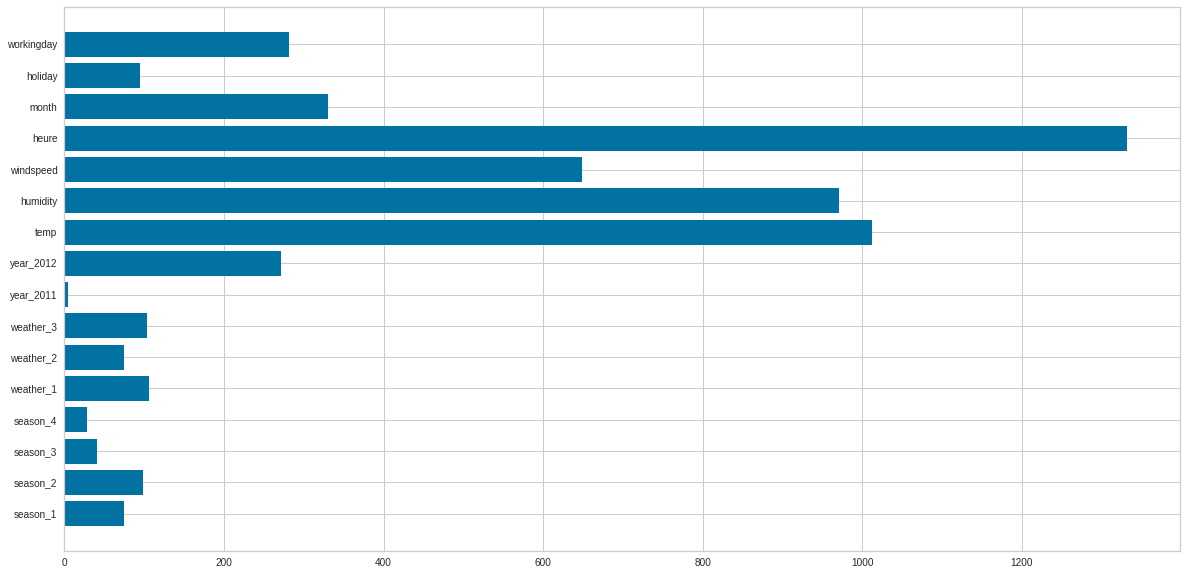

In [29]:
l_one_hot = list(model_xgb[0].transformers_[0][1]["onehotencoder"].get_feature_names(cat_feature))
l_standard = model_xgb[0].transformers_[1][2]
l_reminder = [ X_train.columns[i] for i in model_xgb[0].transformers_[2][2] ]

liste_feature = l_one_hot + l_standard + l_reminder
# a automatiser ???
liste_feature.remove("weather_4")

xgb_score = model_xgb[1].get_booster().get_fscore()


fig = plt.figure(figsize=(20,10))
y_pos = range(0,len(liste_feature))

plt.barh(y_pos,list(xgb_score.values()))
plt.yticks(y_pos,liste_feature)


In [72]:
X_test.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,heure,month,year
0,3,0,0,1,30.34,62,7.0015,0,9,2012
1,3,0,0,1,29.52,74,8.9981,1,9,2012
2,3,0,0,1,28.70,70,11.0014,2,9,2012
3,3,0,0,1,28.70,70,7.0015,3,9,2012
4,3,0,0,1,28.70,70,0.0000,4,9,2012


hyperparametres

In [30]:

param_grid = {
    "xgbregressor__eta":[0.0001,0.001,0.01,0.1],
    "xgbregressor__max_depth" : np.arange(1,10,1),
    "xgbregressor__min_child_weight" : np.arange(1,5,1),
    "xgbregressor__booster" : ["gbtree","gblinear"]

}
search = GridSearchCV(pip,param_grid)

search.fit(X_train,y_train)

print("best score :", search.best_score_)
print(search.best_params_)


[16:11:38] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:11:38] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mis

In [73]:
param_grid = {
    "xgbregressor__eta":[0.0001,0.001,0.01,0.1],
    "xgbregressor__max_depth" : np.arange(1,10,1),
    "xgbregressor__min_child_weight" : np.arange(1,10,1)
}

70.71067811865476

In [30]:
param_best = {'xgbregressor__booster': 'gbtree', 'xgbregressor__eta': 0.0001, 'xgbregressor__max_depth': 5, 'xgbregressor__min_child_weight': 1}

In [31]:
xgb = XGBRegressor(eta=0.0001,max_depth=5)
cat_feature = ["season","weather","year"]
cat_pip = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
num_feature = ["temp","humidity","windspeed","heure","month"]
num_pip = make_pipeline(StandardScaler())
preprocessor = make_column_transformer((cat_pip,cat_feature),(num_pip,num_feature),remainder="passthrough")

pip = make_pipeline(preprocessor,xgb)

In [32]:
model_xgb = pip.fit(X_train,y_train)


print(model_xgb.score(X_train,y_train))
model_xgb.score(X_test,y_test)

#ca ne marche absolument pas

-1.0567959321410183


-1.3666391521978154